In [3]:
import os
import matplotlib.pyplot as plt
import cv2
from matplotlib.widgets import RectangleSelector
from generate_xml import write_xml

In [7]:
# global constants
img = None
tl_list = []
br_list = []
object_list = []

# constants
image_folder = 'media/data/manually_annotated_images/'
savedir = 'media/data/annotations/'
obj = 'positive_tumour_cell'

In [8]:
def line_select_callback(clk, rls):
    global tl_list
    global br_list
    global object_list
    tl_list.append((int(clk.xdata), int(clk.ydata)))
    br_list.append((int(rls.xdata), int(rls.ydata)))
    object_list.append(obj)


def onkeypress(event):
    global object_list
    global tl_list
    global br_list
    global img
    if event.key == 'q':
        print(object_list)
        write_xml(image_folder, img, object_list, tl_list, br_list, savedir)
        tl_list = []
        br_list = []
        object_list = []
        img = None


def toggle_selector(event):
    toggle_selector.RS.set_active(True)

AttributeError: 'FigureManagerBase' object has no attribute 'window'

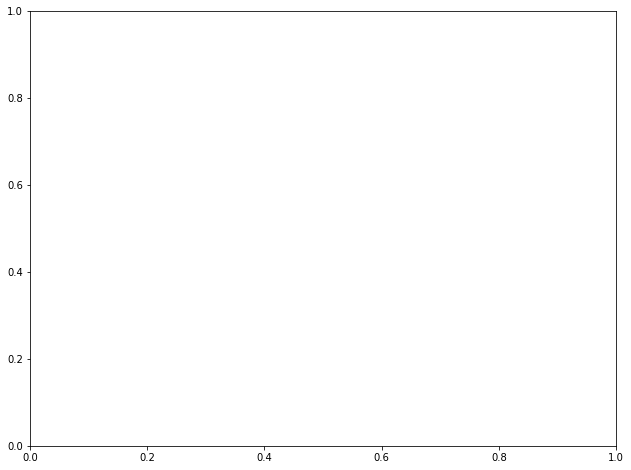

In [10]:
if __name__ == '__main__':
    for n, image_file in enumerate(os.scandir(image_folder)):
        img = image_file
        fig, ax = plt.subplots(1, figsize=(10.5, 8))
        mngr = plt.get_current_fig_manager()
        mngr.window.setGeometry(250, 40, 800, 600)
        image = cv2.imread(image_file.path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)

        toggle_selector.RS = RectangleSelector(
            ax, line_select_callback,
            drawtype='box', useblit=True,
            button=[1], minspanx=5, minspany=5,
            spancoords='pixels', interactive=True,
        )
        bbox = plt.connect('key_press_event', toggle_selector)
        key = plt.connect('key_press_event', onkeypress)
        plt.tight_layout()
        plt.show()
        plt.close(fig)